# Front Matter 

## Module Name: CASA0013-I2P for Spatial Analysts

## Student ID: 20051170

## Title of Paper: Impact of the Coronavirus Pandemic on Airbnb

## Word Count: 1983 words

# Executive Summary

This report explores the relationship between the prices of rentals and coronavirus. Using the datasets from the London Datastore and InsideAirbnb to help us to a better understanding. Also, the reasons for those results should be communicated. And then, the paper shows that actions the Airbnb were carried. Finally, there are some recommendations to Airbnb that would helpful for them to recovery.

The boroughs which have less influence on Covid-19 will attract more guests. Such as the south-western' boroughs have more expensive rent than other regions, where the number of infections remains at a rather lower level. And outer London showed better performance on price recovery.

The industry of real estate in London continues to rebound without the signs of slowing down.

The main reason causes this fall in rents is oversupplied. The Covid-19 would destroy the travel industry and also people must stay at home which will reduce the probability of seeking the houses.

With more restrictions were implemented, Airbnb is the first line to adapt the serves to this coronavirus pandemic. The actions of  ‘Extenuating circumstances’, 'Five-step enhanced cleaning process' and ' Change the model of rents to long-term' have taken fastly by Airbnb.

# Reproducible Analysis

## 1. Download and save data

In [1]:
import urllib.request
import os

I want to check the trends of COVID-19 spread in London, so I download the all listings from January to November.

In [2]:
# Set download URL
url = [
    'http://data.insideairbnb.com/united-kingdom/england/london/2020-11-06/visualisations/listings.csv',
    'http://data.insideairbnb.com/united-kingdom/england/london/2020-10-13/visualisations/listings.csv',
    'http://data.insideairbnb.com/united-kingdom/england/london/2020-09-11/visualisations/listings.csv',
    'http://data.insideairbnb.com/united-kingdom/england/london/2020-08-24/visualisations/listings.csv',
    'http://data.insideairbnb.com/united-kingdom/england/london/2020-07-14/visualisations/listings.csv',
    'http://data.insideairbnb.com/united-kingdom/england/london/2020-06-11/visualisations/listings.csv',
    'http://data.insideairbnb.com/united-kingdom/england/london/2020-05-10/visualisations/listings.csv',
    'http://data.insideairbnb.com/united-kingdom/england/london/2020-04-14/visualisations/listings.csv',
    'http://data.insideairbnb.com/united-kingdom/england/london/2020-03-15/visualisations/listings.csv',
    'http://data.insideairbnb.com/united-kingdom/england/london/2020-02-16/visualisations/listings.csv',
    'http://data.insideairbnb.com/united-kingdom/england/london/2020-01-09/visualisations/listings.csv',
]

In [3]:
# Name the csv files
csvNames = ["20200109listings.csv", "20200216listings.csv", "20200315listings.csv", "20200414listings.csv",
            "20200510listings.csv", "20200611listings.csv", "20200714listings.csv", "20200824listings.csv",
            "20200911listings.csv", "20201013listings.csv", "20201106listings.csv"]

Use the functions to download all kinds of files.

In [4]:
# Define the fuction of download
def down_file(url, fileName):
    try:
        urllib.request.urlretrieve(url, fileName)
    except urllib.request.URLError as e:
        print("Errror: " + str(e))

In [5]:
# Creat a location to save data
def mkdir(path):
    folder = os.path.exists(path)
    if not folder:  # if the folder is not exsit,then creat the new one
        os.makedirs(path)  

Because we need lots of files about listings, I creat a folder to save them.

In [6]:
if __name__ == '__main__': # all csv files have same words 'listings'
    mkdir("./listings") # creat the folder named 'listings' to save the data
    for i, value in enumerate(url): # creat a loop to download the 11 files of csv
        fileName = './listings/'+csvNames[i]
        down_file(value, fileName)

It is easier to download the single file.

In [7]:
# Download the information of London boroughs and save locally
down_file("http://skgrange.github.io/www/data/london_boroughs.json", "London_boroughs.json")

In [8]:
# Download the csv file about COVID-19
down_file("https://data.london.gov.uk/download/coronavirus--covid-19--cases/151e497c-a16e-414e-9e03-9e428f555ae9/phe_cases_london_boroughs.csv","COVID-19.csv")

## 2. Which boroughs are affected most?

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import json

Because I want to use the package of adjustText to show the names on the map, I install this first.

In [10]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [11]:
import adjustText as aT

I don't need all columns in this csv file, so I use a function to select some of them.

In [12]:
# Read csv file with some selected columns
def readCsvB(name):
    return pd.read_csv("./" + name, usecols=['area_name', 'area_code', 'date', 'total_cases'])

### 2.1 Read the information of boroughs

It is slower to read .json file by url, I will use the .json file which I have download before.

In [13]:
london_boroughs = gpd.GeoSeries.from_file('http://skgrange.github.io/www/data/london_boroughs.json')

In [14]:
londonName = [] # Identify all names of London borough in one set
with open("london_boroughs.json", "r") as f: # Now, I read the local file of .json directly
    temp = json.loads(f.read())
    for data in temp['features']:  
        londonName.append(data['properties']['name']) # The names are included on properties
print(londonName) # Print all names of borough
print(len(londonName)) # Check whether the all boroughs are collected

['Kingston upon Thames', 'Croydon', 'Bromley', 'Hounslow', 'Ealing', 'Havering', 'Hillingdon', 'Harrow', 'Brent', 'Barnet', 'Lambeth', 'Southwark', 'Lewisham', 'Greenwich', 'Bexley', 'Enfield', 'Waltham Forest', 'Redbridge', 'Sutton', 'Richmond upon Thames', 'Merton', 'Wandsworth', 'Hammersmith and Fulham', 'Kensington and Chelsea', 'Westminster', 'Camden', 'Tower Hamlets', 'Islington', 'Hackney', 'Haringey', 'Newham', 'Barking and Dagenham', 'City of London']
33


### 2.2 Read the information of Covid-19

This csv file recorded confirmed cases in London boroughs by time series.

Because I focus on the total number of confirmed cases, I creat a dictionary to keep all days information by every boroughs.

In [15]:
dict1 = {}
data = readCsvB("COVID-19.csv")
group = data.groupby("area_name")['total_cases'] # Collect the data which is belongs to each borough
for g in group:
    if g[0] == 'City of London':
        continue
    dict1[g[0]] = max(g[1]) # In this dictionary, maximun value means the accumulate value
print(dict1)

{'Barking and Dagenham': 17343, 'Barnet': 21721, 'Bexley': 17289, 'Brent': 18714, 'Bromley': 18653, 'Camden': 10340, 'Croydon': 21764, 'Ealing': 20198, 'Enfield': 22777, 'Greenwich': 16050, 'Hackney and City of London': 16247, 'Hammersmith and Fulham': 9092, 'Haringey': 15335, 'Harrow': 14385, 'Havering': 21477, 'Hillingdon': 17753, 'Hounslow': 16094, 'Islington': 11156, 'Kensington and Chelsea': 6506, 'Kingston upon Thames': 8962, 'Lambeth': 17118, 'Lewisham': 15713, 'Merton': 11414, 'Newham': 25777, 'Redbridge': 25190, 'Richmond upon Thames': 7915, 'Southwark': 16380, 'Sutton': 11304, 'Tower Hamlets': 22323, 'Waltham Forest': 18676, 'Wandsworth': 16012, 'Westminster': 10055}


In the csv file of coronavirus, Hackney and City of London is treated as one region. However, in the .json file , they are took apart to two different areas.

In [16]:
# Creat a set to keep all Covid-19 numbers
londonNumber = []
for l in londonName: # This loop is to separate regions 
    if l == 'City of London':
        londonNumber.append(10000) # Assumed the city of London has 10000 cases
        continue
    if l == 'Hackney':
        londonNumber.append(dict1['Hackney and City of London'])
        continue
    londonNumber.append(dict1[l])
print(londonNumber)

[8962, 21764, 18653, 16094, 20198, 21477, 17753, 14385, 18714, 21721, 17118, 16380, 15713, 16050, 17289, 22777, 18676, 25190, 11304, 7915, 11414, 16012, 9092, 6506, 10055, 10340, 22323, 11156, 16247, 15335, 25777, 17343, 10000]


Now we can put set of 'name' and set of 'number' together

In [17]:
myData = {
    'name': londonName,
    'number': londonNumber
}

londonData = gpd.GeoDataFrame(myData, geometry=london_boroughs) # And add the information of geometry
print(londonData)

                      name  number  \
0     Kingston upon Thames    8962   
1                  Croydon   21764   
2                  Bromley   18653   
3                 Hounslow   16094   
4                   Ealing   20198   
5                 Havering   21477   
6               Hillingdon   17753   
7                   Harrow   14385   
8                    Brent   18714   
9                   Barnet   21721   
10                 Lambeth   17118   
11               Southwark   16380   
12                Lewisham   15713   
13               Greenwich   16050   
14                  Bexley   17289   
15                 Enfield   22777   
16          Waltham Forest   18676   
17               Redbridge   25190   
18                  Sutton   11304   
19    Richmond upon Thames    7915   
20                  Merton   11414   
21              Wandsworth   16012   
22  Hammersmith and Fulham    9092   
23  Kensington and Chelsea    6506   
24             Westminster   10055   
25          

### 2.3 Make maps

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


POINT (-0.286900448199045 51.38790614496124)
POINT (-0.08715655630493875 51.35533483970667)
POINT (0.05152417541961173 51.37199939713292)
POINT (-0.3671230757961399 51.46837779660612)
POINT (-0.3310263583524417 51.52247494623235)
POINT (0.2211083549158589 51.56438718440948)
POINT (-0.445657631183249 51.54151318333192)
POINT (-0.3412667470031984 51.5977226639192)
POINT (-0.2678206623595279 51.55855616653084)
POINT (-0.2100171075352451 51.61602713355035)
POINT (-0.1182785856207631 51.45308929774379)
POINT (-0.07460182299713111 51.47314648325209)
POINT (-0.0202547851699708 51.44809128055981)
POINT (0.05624350407121555 51.47280680973842)
POINT (0.1403546727151176 51.45881888987536)
POINT (-0.08727164121996193 51.65099541935918)
POINT (-0.01264009517409104 51.59403284805619)
POINT (0.07586659806453909 51.58567207575514)
POINT (-0.1775729971292907 51.3620902832555)
POINT (-0.3129689334204541 51.44217435292957)
POINT (-0.197252064035201 51.40994969280937)
POINT (-0.1864432031993211 51.4513538

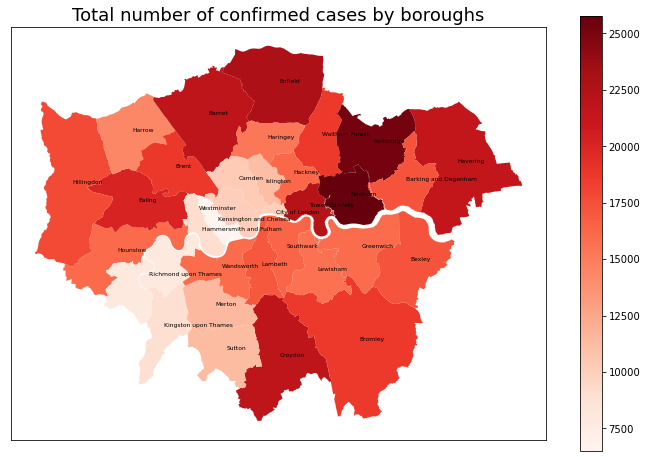

In [18]:
# Inset the imformation to map
base = londonData.plot(column='number', cmap='Reds',figsize=(12, 8), legend=True)
plt.title("Total number of confirmed cases by boroughs", fontsize=18) # Add the title

# Show the names of borough on the map 
texts = []  
i = 0 #  A loop to add all names
for center in londonData.centroid:
    print(center)
    texts.append(plt.text(center.x, center.y, londonName[i], fontsize=6)) # Locate the boroughs
    i = i + 1
aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1, 1), expand_text=(1, 1),
               )

plt.gca().xaxis.set_major_locator(plt.NullLocator())  # Remove the locator of x-axis
plt.gca().yaxis.set_major_locator(plt.NullLocator())  # Remove the locator of y-axis
plt.savefig('./Total number of confirmed cases by boroughs.jpg') # Save the picture
plt.show()

## 3. What is the distribution of price by London boroughs ?

I want to discover the difference between pre-Covid and after-Covid on rental prices of Airbnb by boroughs.

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import mapclassify as mc
import palettable.matplotlib as palmpl
from legendgram import legendgram

Because I want to see the distribution in different months, I use a function to pick the listings file that I need.

In [20]:
def readCsv(name):
    return pd.read_csv("./listings/" + name) # All CSV files are in listings folder

In [21]:
csvNames = ["20200109listings.csv", "20200216listings.csv", "20200315listings.csv", "20200414listings.csv",
            "20200510listings.csv", "20200611listings.csv", "20200714listings.csv", "20200824listings.csv",
            "20200911listings.csv", "20201013listings.csv", "20201106listings.csv"]
data_January = readCsv(csvNames[0]) # I pick the dataset of January which represents the situation of pre-Covid 
print(len(data_January))

76984


In [22]:
# Collect the data with geometry
londonData_January = gpd.GeoDataFrame(data_January, geometry=gpd.points_from_xy(data_January['longitude'], data_January['latitude'], crs='epsg:4326'))
print(londonData_January)

             id                                               name    host_id  \
0         11551         Arty and Bright London Apartment in Zone 2      43039   
1         13913                Holiday London DB Room Let-on going      54730   
2         15400                Bright Chelsea  Apartment. Chelsea!      60302   
3         17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1      67564   
4         17506  Boutique Chelsea/Fulham Double bed 5-star ensuite      67915   
...         ...                                                ...        ...   
76979  46259322  1 BDR Flat - Soho - Central Location - Wardour St  356855972   
76980  46259459                        ✨Double bedroom in Mayfair🌟  320950254   
76981  46259503           Private Double Room just off Ilford Lane  371180765   
76982  46259530          Large double bedroom with private ensuite   10505514   
76983  46261520                 Contemporary modern british design   22456475   

       host_name  neighbour

1308728


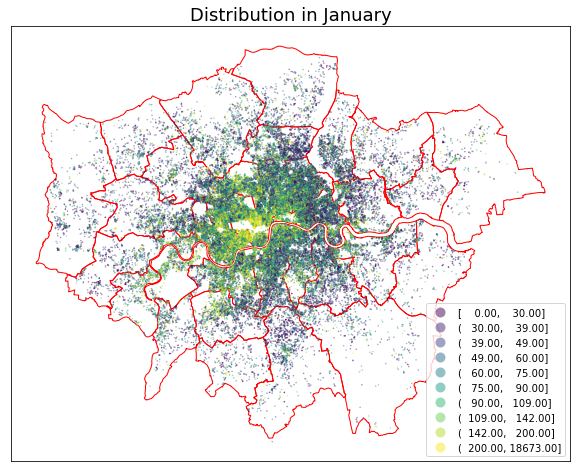

In [23]:
base = london_boroughs.plot(facecolor='none', edgecolor='red', linewidth=1, figsize=(12, 8))

print(londonData_January.size)

# I should pick the column of prices
londonData_January.plot(ax=base, column='price', cmap='viridis', scheme='Quantiles', k=10, markersize=0.25, alpha=0.5, figsize=(12, 8), legend=True)

plt.title("Distribution in January", fontsize=18)
plt.gca().xaxis.set_major_locator(plt.NullLocator())  # Remove the locator of x-axis
plt.gca().yaxis.set_major_locator(plt.NullLocator())  # Remove the locator of y-axis
plt.savefig('Distribution in January.jpg') # Save the picture
plt.show()

Then I select the dataset in June.

1423087


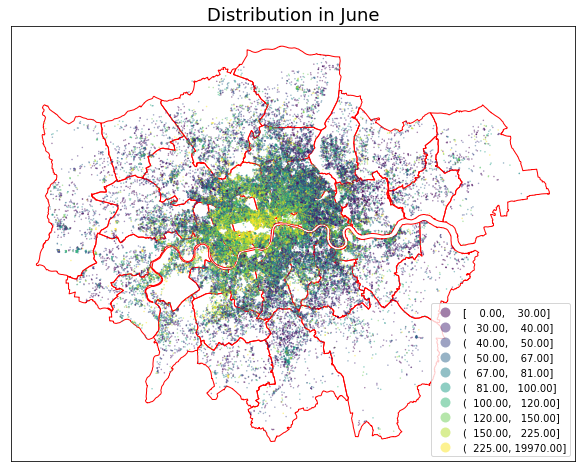

In [24]:
data_June = readCsv(csvNames[5])
londonData_June = gpd.GeoDataFrame(data_June, geometry=gpd.points_from_xy(data_June['longitude'], data_June['latitude'], crs='epsg:4326'))

base = london_boroughs.plot(facecolor='none', edgecolor='red', linewidth=1, figsize=(12, 8))

print(londonData_June.size)

# I should pick the column of prices
londonData_June.plot(ax=base, column='price', cmap='viridis', scheme='Quantiles', k=10, markersize=0.25, alpha=0.5, figsize=(12, 8), legend=True)

plt.title("Distribution in June", fontsize=18)
plt.gca().xaxis.set_major_locator(plt.NullLocator())  # Remove the locator of x-axis
plt.gca().yaxis.set_major_locator(plt.NullLocator())  # Remove the locator of y-axis
plt.savefig('Distribution in June.jpg') # Save the picture
plt.show()

Finally, I select the dataset in November.

1482995


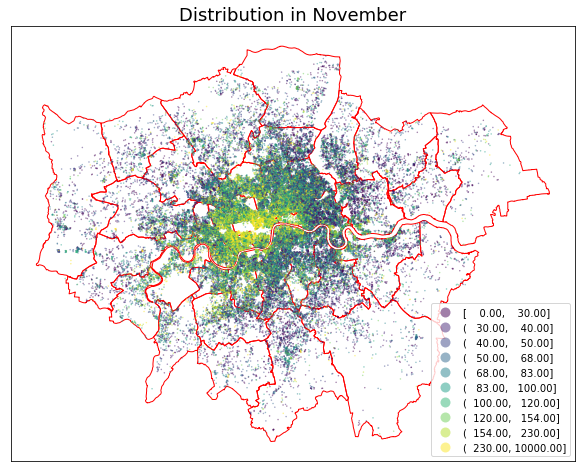

In [25]:
data_November = readCsv(csvNames[10])
londonData_November = gpd.GeoDataFrame(data_November, geometry=gpd.points_from_xy(data_November['longitude'], data_November['latitude'], crs='epsg:4326'))

base = london_boroughs.plot(facecolor='none', edgecolor='red', linewidth=1, figsize=(12, 8))

print(londonData_November.size)

# I should pick the column of prices
londonData_November.plot(ax=base, column='price', cmap='viridis', scheme='Quantiles', k=10, markersize=0.25, alpha=0.5, figsize=(12, 8), legend=True)

plt.title("Distribution in November", fontsize=18)
plt.gca().xaxis.set_major_locator(plt.NullLocator())  # Remove the locator of x-axis
plt.gca().yaxis.set_major_locator(plt.NullLocator())  # Remove the locator of y-axis
plt.savefig('Distribution in November.jpg') # Save the picture
plt.show()

## 4. Some simple plots to explore the data

If we just want to simple check the accumulate number or the trends, some plots are useful.

We also can check whether the data or trends on simple plots are consistent with the maps.

### 4.1 The actual number of cases by boroughs

The bar chart is a suitable plot to indicate the total number.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [27]:
key = []
val = []
for g in group:
    key.append(g[0])
    val.append(max(g[1]))

In [28]:
key.reverse()
val.reverse()
print(key, val)

['Westminster', 'Wandsworth', 'Waltham Forest', 'Tower Hamlets', 'Sutton', 'Southwark', 'Richmond upon Thames', 'Redbridge', 'Newham', 'Merton', 'Lewisham', 'Lambeth', 'Kingston upon Thames', 'Kensington and Chelsea', 'Islington', 'Hounslow', 'Hillingdon', 'Havering', 'Harrow', 'Haringey', 'Hammersmith and Fulham', 'Hackney and City of London', 'Greenwich', 'Enfield', 'Ealing', 'Croydon', 'Camden', 'Bromley', 'Brent', 'Bexley', 'Barnet', 'Barking and Dagenham'] [10055, 16012, 18676, 22323, 11304, 16380, 7915, 25190, 25777, 11414, 15713, 17118, 8962, 6506, 11156, 16094, 17753, 21477, 14385, 15335, 9092, 16247, 16050, 22777, 20198, 21764, 10340, 18653, 18714, 17289, 21721, 17343]


In [29]:
#matplotlib.rcParams['font.sans-serif'] = ['SimHei']
#matplotlib.rcParams['axes.unicode_minus'] = False

I have cleaned and processed the dataset.

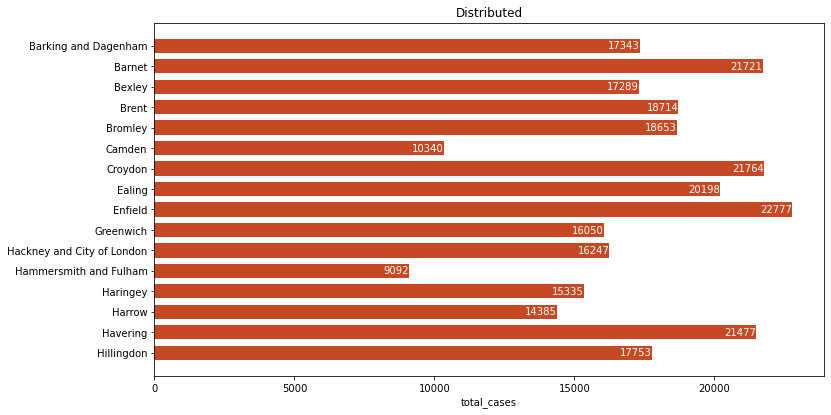

In [30]:
fig, ax = plt.subplots(figsize=(12,6.5))
colors = ['#BF360C']

count = int(len(key)/2) # Show all information on one bar chart is unclear to check, so I select half of all


b = plt.barh(range(len(val[count:])), val[count:], height=0.7, color=colors, alpha=0.9)  # From downside to upside
plt.yticks(range(len(key[count:])), key[count:])
plt.xlabel("total_cases")
plt.title("Distributed")

# I also add number of cases on the each bar
for rect in b:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, '%d'%int(w), fontsize=10, color="white", ha='right', va='center')

plt.show()

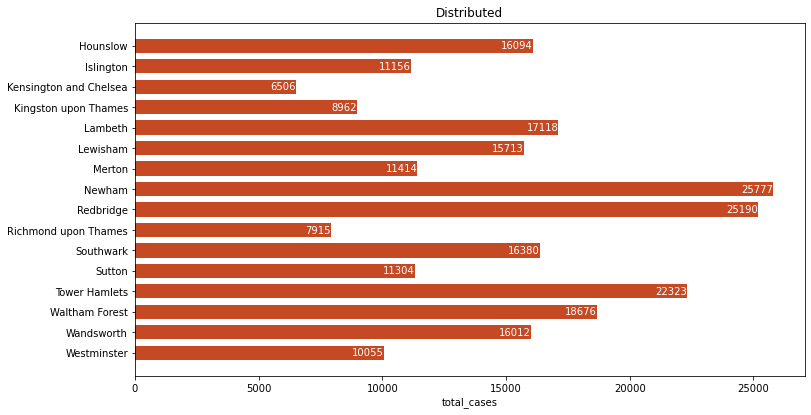

In [31]:
fig, ax = plt.subplots(figsize=(12,6.5))
colors = ['#BF360C']

# Another half of dataset
b = plt.barh(range(len(val[:count])), val[:count], height=0.7, color=colors, alpha=0.9)  # From downside to upside
plt.yticks(range(len(key[:count])), key[:count])
plt.xlabel("total_cases")
plt.title("Distributed")

# I also add number of cases on the each bar
for rect in b:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, '%d'%int(w), fontsize=10, color="white", ha='right', va='center')

plt.show()

It is easy to see that Newham and Redbridge have larger groups of infection than other regions. 

We can also see the map on part of 2.3, the regions of Newham and Redbridge are 'Redder' than other boroughs.

### 4.2 The trends of COVID-19 by boroughs

The line chart is a suitable plot to indicate the trends.

If we put all 32 boroughs in one line graph, which is narrowed. So I add 16 boroughs first.

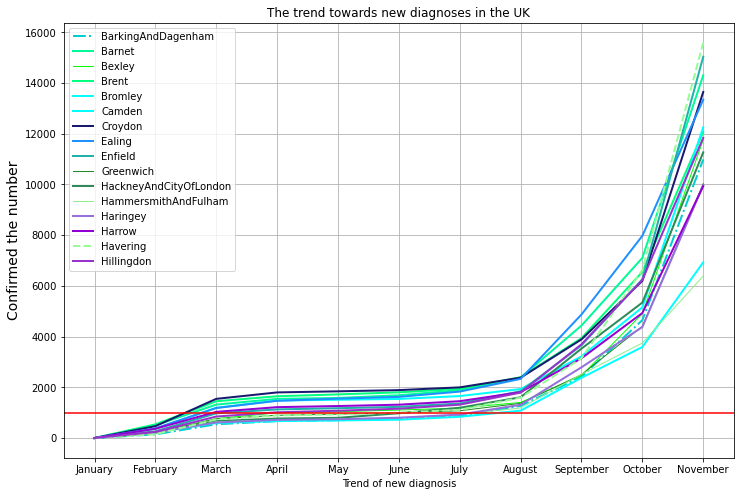

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

xnames = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

BarkingAndDagenham=[0,145,543,666,701,760,869,1270,2419,4650,10985]
Barnet=[1,505,1319,1543,1581,1686,1889,2386,4435,7105,14305]
Bexley=[0,184,768,993,1039,1105,1181,1403,2462,4905,11766]
Brent=[0,540,1451,1647,1721,1803,1941,2398,3938,6553,12070]
Bromley=[0,368,1193,1478,1509,1541,1655,1932,3222,5154,12249]
Camden=[0,227,595,668,694,722,838,1080,2377,3590,6929]
Croydon=[0,468,1545,1799,1842,1890,1998,2380,3890,6197,13647]
Ealing=[1,381,1184,1468,1553,1623,1831,2332,4872,7975,13342]
Enfield=[0,264,973,1129,1176,1229,1362,1846,3657,6264,15035]
Greenwich=[0,220,757,897,943,992,1076,1369,2502,4406,10033]
Hackney=[0,231,669,769,797,977,1194,1609,3526,5342,11266]
HammersmithAndFulham=[0,193,640,706,748,789,924,1187,2516,3748,6389]
Haringey=[0,221,613,716,742,802,925,1311,2789,4378,9969]
Harrow=[0,364,1033,1218,1262,1315,1453,1809,3145,4931,9935]
Havering=[0,152,736,887,932,1002,1113,1591,3146,6624,15590]
Hillingdon=[0,242,848,1015,1077,1156,1315,1791,3697,6235,11836]


if __name__ == '__main__':
    x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
    # Print different lines with different boroughs
    plt.figure(figsize=(12,8))
    plt.plot(x, BarkingAndDagenham, ls='-.', lw=2, label='BarkingAndDagenham', color='DarkTurquoise')
    plt.plot(x, Barnet, ls='-', lw=2, label='Barnet', color='MediumSpringGreen')
    plt.plot(x, Bexley, ls='-', lw=1, label='Bexley', color='Lime')
    plt.plot(x, Brent, ls='-', lw=2, label='Brent', color='SpringGreen')
    plt.plot(x, Bromley, ls='-', lw=2, label='Bromley', color='Aqua')
    plt.plot(x, Camden, ls='-', lw=2, label='Camden', color='Cyan')
    plt.plot(x, Croydon, ls='-', lw=2, label='Croydon', color='MidnightBlue')
    plt.plot(x, Ealing, ls='-', lw=2, label='Ealing', color='DodgerBlue')
    plt.plot(x, Enfield, ls='-', lw=2, label='Enfield', color='LightSeaGreen')
    plt.plot(x, Greenwich, ls='-', lw=1, label='Greenwich', color='ForestGreen')
    plt.plot(x, Hackney, ls='-', lw=2, label='HackneyAndCityOfLondon', color='SeaGreen')
    plt.plot(x, HammersmithAndFulham, ls='-', lw=1, label='HammersmithAndFulham', color='LightGreen')
    plt.plot(x, Haringey, ls='-', lw=2, label='Haringey', color='MediumPurple')
    plt.plot(x, Harrow, ls='-', lw=2, label='Harrow', color='DarkViolet')
    plt.plot(x, Havering, ls='--', lw=2, label='Havering', color='PaleGreen')
    plt.plot(x, Hillingdon, ls='-', lw=2, label='Hillingdon', color='DarkOrchid')

    # Print some legends
    plt.title('The trend towards new diagnoses in the UK')
    plt.xlabel('Trend of new diagnosis')
    plt.ylabel('Confirmed the number', fontsize=14)
    plt.grid(linestyle='-')  # Show the grid
    plt.axhline(1000, color='r')
    plt.legend(loc='upper left')  # Place the legend
    
    plt.show()

Aother 16 boroughs should be plot.

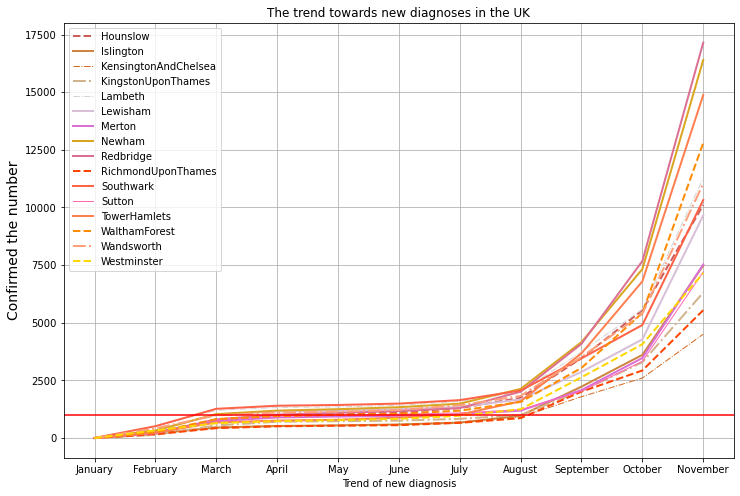

In [33]:
xnames = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

Hounslow=[1,235,783,960,1050,1116,1295,1744,3466,5545,10109]
Islington=[0,194,450,522,547,588,665,973,2229,3606,7486]
KensingtonAndChelsea=[2,215,483,533,558,589,699,907,1793,2600,4505]
KingstonUponThames=[0,139,548,707,732,754,833,1000,2042,3287,6309]
Lambeth=[1,511,1200,1324,1350,1419,1586,1995,3740,5582,11273]
Lewisham=[0,324,1021,1157,1188,1248,1346,1675,2870,4281,9658]
Merton=[1,247,733,892,932,961,1034,1187,2081,3471,7530]
Newham=[0,326,1037,1191,1251,1337,1490,2131,4162,7328,16398]
Redbridge=[0,218,808,1017,1095,1168,1300,2010,4086,7677,17148]
RichmondUponThames=[0,162,428,508,533,557,659,862,2011,2930,5546]
Southwark=[3,513,1267,1401,1434,1494,1645,2061,3456,4903,10325]
Sutton=[0,192,790,956,996,1033,1088,1230,2029,3329,7206]
TowerHamlets=[0,238,675,756,793,884,1020,1594,3673,6794,14880]
WalthamForest=[0,256,821,951,1009,1054,1186,1565,3041,5425,12799]
Wandsworth=[0,420,984,1108,1140,1218,1426,1826,3517,5389,11038]
Westminster=[1,328,644,732,778,831,968,1248,2635,4069,7158]


if __name__ == '__main__':
    x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
    # Print different lines with different boroughs
    plt.figure(figsize=(12,8))
    plt.plot(x, Hounslow, ls='--', lw=2, label='Hounslow', color='IndianRed')
    plt.plot(x, Islington, ls='solid', lw=2, label='Islington', color='Peru')
    plt.plot(x, KensingtonAndChelsea, ls='-.', lw=1, label='KensingtonAndChelsea', color='Chocolate')
    plt.plot(x, KingstonUponThames, ls='-.', lw=2, label='KingstonUponThames', color='Tan')
    plt.plot(x, Lambeth, ls='-.', lw=1, label='Lambeth', color='LightGray')
    plt.plot(x, Lewisham, ls='-', lw=2, label='Lewisham', color='Thistle')
    plt.plot(x, Merton, ls='-', lw=2, label='Merton', color='Orchid')
    plt.plot(x, Newham, ls='-', lw=2, label='Newham', color='GoldenRod')
    plt.plot(x, Redbridge, ls='-', lw=2, label='Redbridge', color='PaleVioletRed')
    plt.plot(x, RichmondUponThames, ls='--', lw=2, label='RichmondUponThames', color='OrangeRed')
    plt.plot(x, Southwark, ls='-', lw=2, label='Southwark', color='Tomato')
    plt.plot(x, Sutton, ls='-', lw=1, label='Sutton', color='HotPink')
    plt.plot(x, TowerHamlets, ls='-', lw=2, label='TowerHamlets', color='Coral')
    plt.plot(x, WalthamForest, ls='--', lw=2, label='WalthamForest', color='Darkorange')
    plt.plot(x, Wandsworth, ls='-.', lw=2, label='Wandsworth', color='LightSalmon')
    plt.plot(x, Westminster, ls='--', lw=2, label='Westminster', color='Gold')

    # Print some legends
    plt.title('The trend towards new diagnoses in the UK')
    plt.xlabel('Trend of new diagnosis')
    plt.ylabel('Confirmed the number', fontsize=14)
    plt.grid(linestyle='-')  # Show the grid
    plt.axhline(1000, color='r')
    plt.legend(loc='upper left')  # Place the legend
    
    plt.show()

We can see the trends of Covid-19 spread in London boroughs, which is growing fast.

# Executive Briefing

## 1. Introduction

In recent year, the sharing economy has been growing at a crazy speed and this new business model has been widely used in tourism (Xu et al., 2020). Airbnb, one outstanding platform of accommodation sharing was established in 2008. Up to the year 2017, the users of Airbnb have covered 65,000 cities in the world (Muchneeded, 2021). On top of six online letting platforms including Booking.com, Airbnb, HouseTrip, HomeAway, Niumba and TripAdvisor, there are 73,549 houses and flats totally which is about 2 per cent of total housing stock (Prynn, 2020).

In 2020, however, the spread of coronavirus has left a detrimental effect on the entire rental business, especially in terms of short-term lettings. Up to the last day of 2020, there are more than 2.38m infection cases of covid-19 in England and more than 62,300 people were lose their lives. According to Public Health England data, nearly all of the boroughs in London have higher infection rates than England average (BBC, 2020a). Rental markets are highly localized; we can see the obvious changes in short or long-term rental business when the growth of employment and mobility of labour are unstable (Norwood, 2020a). 

The aims of this study are to explore the impact of coronavirus on the rental business and trying to find a way to help those short-term letting platforms.

## 2. The relation between rental prices and Covid-19

Before we explore the relationship between the prices of rentals and coronavirus, we should identify which region is suffering most. 

### 2.1 Which borough is the worst-affected region?

The information dataset about Covid-19 is downloaded from London Datastore. This CSV file includes the numbers of confirmed cases in London boroughs between January 31th, 2020 and January 9 th, 2021 (London Datastore, 2021). Data has been processed and cleaned though Python, and in order to represent the data more intuitive, data visualization is completed by inserting the number of cases on the graph. According to figure "Total number of confirmed cases by boroughs" the area of Newnham and Redbridge which are close to the city of London have been affected severely. And the south-western part of London has fewer infection cases, like Kensington and Chelsea and Kingston upon Thames. Upon the time I am writing this paper, the London boroughs of Redbridge and Newham remain the worst-affected regions, and the number of infections in both regions exceeded 23,000. Another borough named Richmond upon Thames has a smaller number of positive cases.

### 2.2 The distribution of short-term rentals on borough levels

Now back to the pricing level of rentals in each borough. The rental index report from HomeLet shows that the top 5 London boroughs with higher average rent are Westminster, Lambeth, Kensington, Camden and Wandsworth which are £2,427, £2,161, £2,109, £1,949 and £1,858 respectively (HomeLet, 2020). And those boroughs located in the mid and south-western of London where the number of infections remains at a rather lower level. This implies that the boroughs which have more influence on Covid-19 will attract fewer gusts. We can observe the largest increase in the South West of London which is up to 8.6 per cent annually (Norwood, 2020b). However, inner London and outer London have different performances during this crisis. The average rent in the whole UK is £974, which figure is increasing by 2.9 % from November 2019; and if the London is excluded, the figure of average rent will have an increase of 5.6 % (Norwood, 2020b). Andy Halstead, the chief executive officer of HomeLet & Let Alliance has mentioned that rents in outside of central London increasing at the highest rate, in contrast, rents in London are now decreasing at the highest rates that they have ever seen (Silva, 2020).

To better understand the trends of users’ preference, the listings files (Inside Airbnb, 2020) from January to November is downloaded from the Inside Airbnb website. Not only I did some simple plots to observe the data, but I made maps filled with price by Python. Pictures of “Distribution in January”, “Distribution in June” and “Distribution in November” indicate the distribution of rentals’ price by boroughs. For the reason that every CSV file has more than 1,300,000 listings, we need to check the difference carefully. I choose the three-time periods which are January, June and November. From January to June, we can see more yellow points lay in the central city. In the middle areas, the prices of rental increased slightly. And the reason why we observe the increment is the social restriction easing. After the first lockdown on March 23, 2020, the spread of coronavirus slowed down, so that government implemented some relax rules including ‘eat out to help out’ to stimulate the economy. (Gov.uk 2020) However, the second lockdown was announced by Prime Minister (Boris Johnson) on October 31 (Sun, 2021), which also declines the mobility of Londoners and then more green points can be observed on the centre of the city.

### 2.3 The different response from the real estate 

Even though the UK is suffering from Brexit and Covid-19 lockdown, London’s prime real estate continues to rebound without the signs of slowing down (Bloomfiekd, 2020). A report from Rightmove, the average price of a house in London’s property market reached a national record of £323,530, with a 5.5% increase from the same time last year (Rightmove, 2020a). What’s more, the number of sales reached the highest number which is up to 70% better than that in September last year (Lucking, 2020). Lucking also mentioned that buyers have more time spending at home because of lockdown. Another reason is the country’ stamp duty holiday which is prompting buyers to make moves. This policy attracts people both British and international buyers. The report of Savills shows that 49% which is almost half of all homes went to international buyers and most of them are from Western Europe and China (Bloomfiekd, 2020).

## 3. The reason why the rents decreased

The answer is demand. Asking rents decreased by 0.6% between April and June in London, which is compared to the same quarter in 2019. And the vacancy rate is climbing to 6.14% in November (Homes and property, 2020). Due to the influence of an extended lockdown hit the market of renting, there is a 41% increase in rental stock (Rightmove, 2020b). There are many reasons why the short-lettings rental market is oversupplied in London now. Not only the limited mobility of labours who are asked to work remotely, but losing jobs is the key reason to hurt renters (Scott, 2020). Tourism has been affected a lot, hitting the short-lettings rent of Airbnb. An analysis carried out by the mayor’s office showed that there would be a 48% drop in domestic tourism and a fall of 77% drop in foreign tourism compared with last year in 2019 (BBC, 2020b). The significant decline in the numbers of international students is another factor contributing to the current glut in the capital (Farmaki et al., 2020) Chestertons which is one of the leading lettings company in the capital said that there were thirty percentage of tenants in the central city usually from the overseas students (Jones, 2020). In short, the demand has a significant fall which is the key factor to make short-term letting down in central London.

Matt Hutchinson, SpareRoom director said that because of the social restrictions on moving home, people have low confidence in their incomes, so they want to ‘flight from London’ to other areas of the UK (Norwood, 2020a). Another reason attributes to decrease the price of London rents is people want to escape the area with London underground connections, which traditionally have a premium. Also, the fears of coronavirus keep people away from the area with the tube (Homes and property, 2020).

## 4. The actions of Airbnb to get rid of an awkward situation

In 2008, three friends from college established a company named Airbnb. After they started with their own house as the first listing, this company has grown quickly and it has more than 7 million listings worldwide (Evans, 2020) Due to the covid-19 pandemic, the tourism industry has received a heavy blow, so did Airbnb meet a sudden existential crisis. Compared to the number of bookings for nights and experiences last year, the number this year plunged by 72%. What’s worse, there were more cancellations than bookings in Airbnb from March to April (Taulli,2020). Brian Chesky, CEO of Airbnb, announced that the revenue in 2020 will be less than half of how much the company earned last year (Evans, 2020). From 2008, this kind of get-rich-quick Airbnb business model attracts a great number of individuals and companies, this crisis brings no income and even a huge financial liability (Temperton, 2020). With more restrictions were implemented, Airbnb is the first line to adapt the serves to this coronavirus pandemic (Mauguin, 2020).

### 4.1 ‘Extenuating circumstances’

On 14 of March, the company of Airbnb announced an ‘extenuating circumstances’ which means all guests will get full-refund for cancellation if they booked between March 14 and May 31. This policy has caused hardship for hosts of Airbnb, however, the company said that the health of the public and its communities are the priority (Wisniewska, 2020).
As for this generosity to gusts, 700,000 hosts complaint at the income they are losing. And soon Chesky apologized and promised they would spend £200m covering one-fourth of what hosts lost under this cancellation policies. An additional $10m relief fund is provided for ‘super hosts’ and offering allowance of up to $5,000 for the hosts who hurt the most (Neate, 2020). This is no doubt that guests will have more trust in Airbnb.

### 4.2 Five-step enhanced cleaning process

Seven months after Covid-19 began spreading globally, Airbnb at the beginning of October finally composed all of its properties should take COVID-19 safety practices, which to help slow down the spread of the virus (Taylor, 2020). Beginning with 20 November, all guests and hosts of Airbnb should be required to abide by cleaning procedures and also mask requirements and social distancing (Airbnb, 2020). After the announcement, more than 1.5 million Airbnb listings have achieved the requirements of Covid-19 guidelines. And results of this action, compared with the properties that were not meet these requirements, a three-times increase in booking can be seen on the properties who achieved the Airbnb’s Covid guidelines (Taylor, 2020). And this policy is responsible for guests and hosts who using the Airbnb during the period of coronavirus pandemic. 

### 4.3 Change the model of rents

And another side of the market, the collapse of Airbnb short-lettings rentals results in a sudden wave of the long-term rentals, Airbnb decided to move from short-term to long-term rentals (Temperton, 2020). And this decision is also consistent with what people want, they trying to fly away from the crowded cities. During this covid crisis, it is a good job that Airbnb has the ability to turn a hopeless situation into a change to generate new income (Mauguin, 2020).

## 5. Conclusion

In this paper, we can see that the short-lettings company like Airbnb has been hit by this global pandemic. To adapt to this new trend, Airbnb has done much work for recovery, however, under this serious circumstance, they should take more actions. Firstly, this necessary for the company to make sure the communication effectively. In the worldwide, government and local agencies want to find more ways to receive and along with the information. And the business of Airbnb is around the world, it is possible for this acts as a special tool to deliver the important ‘messages. Secondly, Airbnb can provide cheaper houses for medical staffs who have to stay closer to hospitals. Also, the government can provide the rental allowance for those staffs who are fighting with the virus. However, the coronavirus outbreak brings the challenge which also is the kinds of the chance to grow up.

## Reference

Airbnb.com, (2020). Our Commitment to Safer Travel: New Health and Safety Mandate [online] Available at: https://news.airbnb.com/health-and-safety-mandate/ [Accessed 12 Jan. 2021].

BBC.com, (2020). Coronavirus: Latest figures for London [online] Available at: https://www.bbc.com/news/uk-england-london-54324244 [Accessed 12 Jan. 2021].

BBC.com, (2020). Covid-19: London tourism spending 'to plummet £10.9bn' [online] Available at: https://www.bbc.com/news/uk-england-london-54659066 [Accessed 12 Jan. 2021].

Bloomfield, R. (2020). Capital gains: what is driving the demand for high-end homes in London? [online] Available at: https://luxurylondon.co.uk/house/property/prime-real-estate-property-market-london-2020 [Accessed 12 Jan. 2021].

Evans, D. (2020). Airbnb’s future is uncertain as it continues to struggle through its Covid-19 response [online] Available at: https://www.cnbc.com/2020/05/06/can-airbnb-survive-the-coronavirus-pandemic.html [Accessed 12 Jan. 2021].

Farmaki, A., Miguel, C., Hadjielia, M., Aleksi, A., Ceh, A. and Efthymiadou, F. (2020). ‘Since January 2020 Elsevier has created a COVID-19 resource centre with free information in English and Mandarin on the novel coronavirus COVID- 19 . The COVID-19 resource centre is hosted on Elsevier Connect , the company ’ s public news and information ’, (January).

Gov.uk, (2020). Get a discount with the Eat Out to Help Out Scheme [online] Available at: https://www.gov.uk/guidance/get-a-discount-with-the-eat-out-to-help-out-scheme [Accessed 12 Jan. 2021].

HomeLet.com, (2020). Average Rent in London By Borough [online] Available at: https://homelet.co.uk/homelet-rental-index/borough [Accessed 12 Jan. 2021].

Homesandproperty.com, (2020). London rent falls: the postcodes where renting costs have dropped most [online] Available at: https://www.homesandproperty.co.uk/property-news/renting/london-rent-falls-areas-rent-drop-a139371.html [Accessed 12 Jan. 2021].

Insideairbnb.com, (2020). Get the Data [online] Available at: https://www.lettingagenttoday.co.uk/breaking-news/2020/12/london-rents-down-as-much-as-16-while-rest-of-uk-booms [Accessed 12 Jan. 2021].

Jones, R. (2020). Landlords slash rents by up to 20% as tenants quit city centres in pandemic [online] Available at: https://www.theguardian.com/money/2020/sep/20/private-rents-plunge-covid-19-decimates-lettings-market-workplace-space-gardens [Accessed 12 Jan. 2021].

LondonDatastore.com, (2021). Coronavirus (COVID-19) Cases [online] Available at: https://data.london.gov.uk/download/coronavirus--covid-19--cases/151e497c-a16e-414e-9e03-9e428f555ae9/phe_cases_london_boroughs.csv [Accessed 12 Jan. 2021].

Lucking, L. (2020). Latest England Lockdown Will Not Have the Same Severe Impact on Property Market as It Did in the Spring [online] Available at: https://www.mansionglobal.com/articles/latest-england-lockdown-will-not-have-the-same-severe-impact-on-property-market-as-it-did-in-the-spring-220907 [Accessed 12 Jan. 2021].

Mauguin, M. (2020). What hotels can learn from Airbnb’s response to the COVID-19 crisis [online] Available at: https://www.wired.co.uk/article/airbnb-coronavirus-london [Accessed 12 Jan. 2021].

Muchneeded.com, (2021). Airbnb by the Numbers: Usage, Demographics, and Revenue Growth [online] Available at: https://muchneeded.com/airbnb-statistics/ [Accessed 12 Jan. 2021].

Neate, R. (2020). How the Covid-19 crisis locked Airbnb out of its own homes [online] Available at: https://www.theguardian.com/technology/2020/apr/04/how-the-covid-19-crisis-locked-airbnb-out-of-its-own-homes [Accessed 12 Jan. 2021].

Norwood, G. (2020). Exclusive: Rental market recovering fast but now more segmented [online] Available at: https://www.lettingagenttoday.co.uk/breaking-news/2020/12/exclusive-rental-market-recovering-fast-but-now-more-segmented [Accessed 12 Jan. 2021]. 

Norwood, G. (2020). London rents down as much as 16% while rest of UK booms [online] Available at: https://www.lettingagenttoday.co.uk/breaking-news/2020/12/london-rents-down-as-much-as-16-while-rest-of-uk-booms [Accessed 12 Jan. 2021].

Prynn, J. (2020). AirBnB in London:one in 50 London homes now used as short lets not housing [online] Available at: https://www.homesandproperty.co.uk/property-news/airbnb-london-short-lets-homes-a136111.html [Accessed 12 Jan. 2021].

Rightmove.com, (2020). House Price Index [online] Available at: https://www.rightmove.co.uk/press-centre/house-price-index/november-2020/ [Accessed 12 Jan. 2021].

Rightmove.com, (2020). London rents fall as choice for tenants increases [online] Available at: https://www.rightmove.co.uk/news/articles/property-news/london-rents-fall-as-choice-increases/ [Accessed 12 Jan. 2021].

Scott, A. (2020). Rents are falling in some cities [online] Available at: https://www.marketplace.org/2020/08/19/why-rents-falling-some-cities-during-pandemic/ [Accessed 12 Jan. 2021].

Silva, M. (2020). UK rents continue to grow [online] Available at: https://www.lettingagenttoday.co.uk/breaking-news/2020/12/london-rents-down-as-much-as-16-while-rest-of-uk-booms [Accessed 12 Jan. 2021].

Sun.com, (2021). LOCKED IN When did lockdown start in the UK? [online] Available at: https://www.thesun.co.uk/news/11304061/uk-coronavirus-lockdown-month-lasted-start-end/ [Accessed 12 Jan. 2021].

Taulli, T. (2020). How Airbnb Beat The Covid-19 Virus [online] Available at: https://www.forbes.com/sites/tomtaulli/2020/11/21/how-airbnb-beat-the-covid-19-virus/?sh=4f3b14272bcf [Accessed 12 Jan. 2021].

Taylor, P. (2020). AirBnB Just Cracked Down On COVID-19 With Mandatory Global Cleaning And Safety Protocols. Why Did It Take So Long? [online] Available at: https://www.forbes.com/sites/petertaylor/2020/10/23/airbnb-just-cracked-down-on-covid-19-with-mandatory-global-cleaning-and-safety-protocols-why-did-it-take-so-long/?sh=7045e8e85d0b [Accessed 12 Jan. 2021].

Temperton, J. (2020). London’s rental market is being flooded by bargain Airbnb listings [online] Available at: https://www.wired.co.uk/article/airbnb-coronavirus-london [Accessed 12 Jan. 2021].

Wisniewska, A. (2020). How Airbnb hosts are fighting back against Covid-19 fallout [online] Available at: https://www.ft.com/content/9d092b78-7045-11ea-89df-41bea055720b [Accessed 12 Jan. 2021].

Xu, F., Hu, M., La, L., Wang, J. and Huang, C. (2020). ‘The influence of neighbourhood environment on Airbnb: a geographically weighed regression analysis’. Tourism Geographies, 22 (1), pp. 192–209. doi: 10.1080/14616688.2019.1586987.